Práctica realizada por Raúl Rivero, Álvaro Pérez y Daniel Rebollar

# **Descripción del problema y Preprocesamiento**
Disponemos de un conjunto de datos con imágenes de escenas de la
naturaleza de todo el mundo.<br><br>
El problema de clasificación a resolver consiste en
determinar la etiqueta de una imagen conteniendo una
escena entre un conjunto de etiquetas predefinidas.<br><br>
## **El conjunto de datos**
El conjunto de datos contiene 17.000 imágenes de tamaño 150x150 píxeles
etiquetadas en 6 categorías diferentes:<br>
edificios -> 0<br>
bosques -> 1<br>
glaciares -> 2<br>
montañas -> 3<br>
mares -> 4<br>
calles -> 5<br>


En primer lugar vamos a importar todo lo necesario para realizar la práctica.

In [ ]:
import urllib
from urllib import request
import zipfile
import numpy as np
from skimage import io
from skimage import filters
import os
import os.path
import pandas as pd
from skimage import transform
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import StackingClassifier

A continuación descargamos de la página web donde está el Dataset el conjunto de imágenes para Train y para Test.<br>
Se descargan los ficheros .zip y se descomprimen en sus respectivas carpetas dentro de colab.

In [ ]:
drive_url_test = 'https://drive.upm.es/index.php/s/vdYG7VsSfEucX9U/download?path=%2F&files=test.zip'
testfile = 'test.zip'

drive_url_train = 'https://drive.upm.es/index.php/s/vdYG7VsSfEucX9U/download?path=%2F&files=train.zip'
trainfile = 'train.zip'

urllib.request.urlretrieve(drive_url_test, testfile)
urllib.request.urlretrieve(drive_url_train, trainfile);

In [ ]:
zip_ref = zipfile.ZipFile("/content/test.zip", 'r')
zip_ref.extractall("/tmp/test")
zip_ref.close()
zip_ref = zipfile.ZipFile("/content/train.zip", 'r')
zip_ref.extractall("/tmp/train")
zip_ref.close()

El siguiente paso es guardar las imágenes en listas para más adelante guardarlas todas en un mismo DataFrame. En lugar de guardar todas las imágenes que habia disponibles se guardan 1050 de cada categoría.<br>
Además se hace una criba de imágenes que no tengan un tamaño de 150x150 ya que en el enunciado se dice que todas poseen dicho tamaño y así también se puede garantizar que no haya columnas extra sin datos.<br>
Al inicio probamos a recortar un poco los bordes de la imagen para poder reducir su dimensionalidad y que fuese más facil trabajar con los datos (como se puede ver en la línea comentada). Vimos que no era lo más eficiente y decidimos hacerle un resize a las imágenes para que todas tuviesen un tamaño de 85x85.<br>
Por último les hemos aplicado un filtro, en este caso `unsharp_mask` que nos permite mejorar los resultados del `accuracy_score`. Probamos diferentes valores y vimos que el mejor era `radius = 9`.

In [ ]:
radius = 9
h = 85
w = 85
listaBosque = []
cont = 0
max = 0
for i in os.listdir("/tmp/train/bosques"):
  aux = io.imread("/tmp/train/bosques/" + i)
  if(aux.shape == (150,150,3) and (cont % 2 == 0) and (max < 1050)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    listaBosque.append(aux.reshape(-1))
    max = max + 1
  cont = cont + 1

In [ ]:
listaCalles = []
cont = 0
max = 0
for i in os.listdir("/tmp/train/calles"):
  aux = io.imread("/tmp/train/calles/" + i)
  if(aux.shape == (150,150,3) and (cont % 2 == 0) and (max < 1050)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    listaCalles.append(aux.reshape(-1))
    max = max + 1
  cont = cont + 1

In [ ]:
listaEdificios = []
cont = 0
max = 0
for i in os.listdir("/tmp/train/edificios"):
  aux = io.imread("/tmp/train/edificios/" + i)
  if(aux.shape == (150,150,3) and (cont % 2 == 0) and (max < 1050)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    listaEdificios.append(aux.reshape(-1))
    max = max + 1
  cont = cont + 1

In [ ]:
listaGlaciares = []
cont = 0
max = 0
for i in os.listdir("/tmp/train/glaciares"):
  aux = io.imread("/tmp/train/glaciares/" + i)
  if(aux.shape == (150,150,3) and (cont % 2 == 0) and (max < 1050)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    listaGlaciares.append(aux.reshape(-1))
    max = max + 1
  cont = cont + 1

In [ ]:
listaMares = []
cont = 0
max = 0
for i in os.listdir("/tmp/train/mares"):
  aux = io.imread("/tmp/train/mares/" + i)
  if(aux.shape == (150,150,3) and (cont % 2 == 0) and (max < 1050)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    listaMares.append(aux.reshape(-1))
    max = max + 1
  cont = cont + 1

In [ ]:
listaMontanias = []
cont = 0
max = 0
for i in os.listdir("/tmp/train/montan╠âas"):
  aux = io.imread("/tmp/train/montan╠âas/" + i)
  if(aux.shape == (150,150,3) and (cont % 2 == 0) and (max < 1050)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    listaMontanias.append(aux.reshape(-1))
    max = max + 1
  cont = cont + 1

Se puede comprobar que el número de imágenes por lista es de 1050 en todos los casos.

In [ ]:
print("Podemos observar que el número de imagenes de cada lista es:")
print("Bosques: " +  str(len(listaBosque)))
print("Calles: " + str(len(listaCalles)))
print("Edificios: " + str(len(listaEdificios)))
print("Glaciares: " + str(len(listaGlaciares)))
print("Mares: " + str(len(listaMares)))
print("Montañas: " + str(len(listaMontanias)))

Podemos observar que el número de imagenes de cada lista es:
Bosques: 1050
Calles: 1050
Edificios: 1050
Glaciares: 1050
Mares: 1050
Montañas: 1050


Guardamos cada lista en su respectivo DataFrame y después les añadimos una columna de `Objetivo` que más adelante será nuestro `y_train`

In [ ]:
DF_Bosques = pd.DataFrame(listaBosque)
DF_Calles = pd.DataFrame(listaCalles)
DF_Edificios = pd.DataFrame(listaEdificios)
DF_Glaciares = pd.DataFrame(listaGlaciares)
DF_Mares = pd.DataFrame(listaMares)
DF_Montanias = pd.DataFrame(listaMontanias)

In [ ]:
DF_Bosques["Objetivo"] = 1
DF_Calles["Objetivo"] = 5
DF_Edificios["Objetivo"] = 0
DF_Glaciares["Objetivo"] = 2
DF_Mares["Objetivo"] = 4
DF_Montanias["Objetivo"] = 3

Lo unimos todo en un mismo DataFrame

In [ ]:
DF_Completo = pd.concat([DF_Bosques, DF_Calles, DF_Edificios, DF_Glaciares, DF_Mares, DF_Montanias])
DF_Completo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,21636,21637,21638,21639,21640,21641,21642,21643,21644,21645,21646,21647,21648,21649,21650,21651,21652,21653,21654,21655,21656,21657,21658,21659,21660,21661,21662,21663,21664,21665,21666,21667,21668,21669,21670,21671,21672,21673,21674,Objetivo
0,0.804529,0.882967,0.275199,0.919830,1.000000,0.100562,0.942816,1.000000,0.178009,0.857427,0.946795,0.152278,1.000000,1.000000,0.425994,1.000000,1.000000,0.479934,1.000000,1.000000,0.288062,1.000000,1.000000,0.530860,0.751159,0.795448,0.359809,1.000000,1.000000,0.942456,0.542979,0.565992,0.363503,0.122712,0.182525,0.000000,0.107192,0.149392,0.000000,0.177255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003555,0.000000,0.000000,0.006383,0.000000,0.000000,0.005335,0.000000,0.000000,0.014893,0.007050,0.000000,0.007467,0.000000,0.000000,0.012360,0.004517,0.000658,0.010299,0.000000,0.008028,0.003611,0.000000,0.031353,0.031352,0.016820,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307781,0.307781,0.307781,0.291752,0.291752,0.291752,0.108342,0.108342,0.108342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223073,0.223073,0.223073,0.167723,0.167723,0.167723,0.000000,0.000000,0.000000,0.124752,...,0.260674,0.260674,0.260674,0.206510,0.206510,0.206510,0.074029,0.074029,0.074029,0.143323,0.143323,0.143323,0.128866,0.128866,0.128866,0.045231,0.045231,0.045231,0.160711,0.160711,0.160711,0.000000,0.000000,0.000000,0.048972,0.048972,0.048972,0.366235,0.366235,0.366235,0.456461,0.456461,0.456461,0.392723,0.392723,0.392723,0.356327,0.356327,0.356327,1
2,0.431170,0.578756,0.096039,0.570082,0.731978,0.598287,0.326125,0.490572,0.268252,0.823080,0.961576,0.724485,1.000000,1.000000,1.000000,0.078924,0.248310,0.000000,0.008226,0.257523,0.000000,0.398341,0.513327,0.151642,0.396341,0.570619,0.043747,0.114246,0.274724,0.000000,0.205593,0.362190,0.056092,0.136285,0.332288,0.000000,0.035321,0.205176,0.000000,0.000000,...,0.351398,0.408328,0.177682,0.174342,0.215559,0.059457,0.000000,0.013790,0.000000,0.000000,0.000000,0.000000,0.060638,0.106197,0.000000,0.198594,0.232660,0.094401,0.093770,0.126933,0.024064,0.015834,0.040978,0.000000,0.044647,0.094982,0.019042,0.000000,0.022767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004781,0.000000,1
3,0.733139,0.843348,0.000000,0.716534,0.800439,0.000000,0.658422,0.790342,0.000000,0.632212,0.746757,0.000000,0.662632,0.781139,0.000000,0.516105,0.681725,0.000000,0.428131,0.610971,0.000000,0.668905,0.886076,0.000000,0.562293,0.805775,0.000000,0.643790,0.807904,0.000000,0.548737,0.754842,0.000000,0.497462,0.763978,0.000000,0.467133,0.733398,0.000000,0.625156,...,0.664525,0.280857,0.047239,0.564842,0.239584,0.027250,0.600354,0.286576,0.087757,0.829409,0.405344,0.155389,0.976368,0.526658,0.221468,0.744922,0.332799,0.038119,0.668362,0.258355,0.000000,0.874135,0.487515,0.204708,0.754049,0.353466,0.078679,0.734949,0.309256,0.052421,0.616125,0.207292,0.000000,0.755554,0.350962,0.064647,0.673469,0.255925,0.000000,1
4,0.516589,0.962139,0.344224,0.311838,0.883666,0.000000,0.246576,0.624381,0.000000,0.386621,1.000000,0.144828,0.744199,1.000000,0.547904,0.527552,1.000000,0.106357,0.351736,1.000000,0.000000,0.543669,1.000000,0.293401,0.660773,1.000000,0.342665,0.561610,1.000000,0.220509,0.638125,1.000000,0.286724,0.865946,1.000000,0.273919,0.468313,0.765774,0.127062,0.000000,...,0.162426,0.564066,0.000000,0.249951,0.762982,0.036585,0.071156,0.656852,0.000000,0.147943,0.649698,0.192207,0.000000,0.234604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017628,0.000000,0.000000,0.185858,0.000000,0.108890,0.533387,0.000000,0.000000,0.462638,0.000000,0.293682,0.795620,0.155966,0.046262,0.499778,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...

Dado que el entorno que estamos utilizando es Google Colab y es bastante limitado, hemos decidido ir borrando variables que sabemos que ya no vamos a usar para ahorrar RAM.

In [ ]:
del listaBosque
del listaCalles
del listaEdificios
del listaGlaciares
del listaMares
del listaMontanias

del DF_Bosques
del DF_Calles
del DF_Edificios
del DF_Glaciares
del DF_Mares
del DF_Montanias

Esta vez vamos a realizar lo mismo que con Train, pero se van a coger todas las imágenes de Test, no se van a limitar.

In [ ]:
testlistaBosque = []
for i in os.listdir("/tmp/test/bosques"):
  aux = io.imread("/tmp/test/bosques/" + i)
  if(aux.shape == (150,150,3)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))   
    aux = filters.unsharp_mask(aux, radius=radius)
    testlistaBosque.append(aux.reshape(-1))

testlistaCalles = []
for i in os.listdir("/tmp/test/calles"):
  aux = io.imread("/tmp/test/calles/" + i)
  if(aux.shape == (150,150,3)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    testlistaCalles.append(aux.reshape(-1))

testlistaEdificios = []
for i in os.listdir("/tmp/test/edificios"):
  aux = io.imread("/tmp/test/edificios/" + i)
  if(aux.shape == (150,150,3)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    testlistaEdificios.append(aux.reshape(-1))

testlistaGlaciares = []
for i in os.listdir("/tmp/test/glaciares"):
  aux = io.imread("/tmp/test/glaciares/" + i)
  if(aux.shape == (150,150,3)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    testlistaGlaciares.append(aux.reshape(-1))

testlistaMares = []
for i in os.listdir("/tmp/test/mares"):
  aux = io.imread("/tmp/test/mares/" + i)
  if(aux.shape == (150,150,3)):
   #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    testlistaMares.append(aux.reshape(-1))

testlistaMontanias = []
for i in os.listdir("/tmp/test/montan╠âas"):
  aux = io.imread("/tmp/test/montan╠âas/" + i)
  if(aux.shape == (150,150,3)):
    #aux = aux[20:130, 20:130 , : ]
    aux = transform.resize(aux,output_shape=(h,w))
    aux = filters.unsharp_mask(aux, radius=radius)
    testlistaMontanias.append(aux.reshape(-1))

testDF_Bosques = pd.DataFrame(testlistaBosque)
testDF_Calles = pd.DataFrame(testlistaCalles)
testDF_Edificios = pd.DataFrame(testlistaEdificios)
testDF_Glaciares = pd.DataFrame(testlistaGlaciares)
testDF_Mares = pd.DataFrame(testlistaMares)
testDF_Montanias = pd.DataFrame(testlistaMontanias)

testDF_Bosques["Objetivo"] = 1
testDF_Calles["Objetivo"] = 5
testDF_Edificios["Objetivo"] = 0
testDF_Glaciares["Objetivo"] = 2
testDF_Mares["Objetivo"] = 4
testDF_Montanias["Objetivo"] = 3

DF_Test = pd.concat([testDF_Bosques, testDF_Calles, testDF_Edificios, testDF_Glaciares, testDF_Mares, testDF_Montanias])

A continuación dividimos los datos en los conjuntos `X_train`, `y_train`, `X_test` e `y_test`.

In [ ]:
X_test = DF_Test.drop(["Objetivo"], axis=1)
y_test = DF_Test[["Objetivo"]]
y_test = y_test.to_numpy()
y_test = y_test.transpose().reshape(-1)

In [ ]:
X_train = DF_Completo.drop(["Objetivo"], axis=1)
y_train = DF_Completo[["Objetivo"]]
y_train = y_train.to_numpy()
y_train = y_train.transpose().reshape(-1)

De nuevo, volvemos a borrar datos que ya no vamos a utilizar para liberar espacio de RAM.

In [ ]:
del testlistaBosque
del testlistaCalles
del testlistaEdificios
del testlistaGlaciares
del testlistaMares
del testlistaMontanias

del testDF_Bosques
del testDF_Calles
del testDF_Edificios
del testDF_Glaciares
del testDF_Mares
del testDF_Montanias

# **Algoritmos de Clasificación**

## BaggingClassifier con SVC

In [ ]:
bagSVC_clf = BaggingClassifier(
    base_estimator=SVC(random_state=1337, gamma='scale', probability=True), 
    n_estimators=200,
    max_samples=1500, 
    max_features=2,
    n_jobs=-1, 
    random_state=1337)

bagSVC_clf.fit(X_train, y_train);

In [ ]:
y_pred = bagSVC_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

El resultado es: 0.49482124958235885


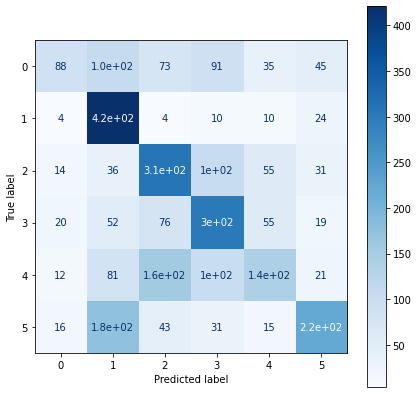

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(bagSVC_clf, X_test, y_test, normalize=None, cmap='Blues', ax=ax)

Como se puede ver arriba el resultado del accuracy score es de 0.4948, lo cual para el caso que tratamos y las imágenes que tenemos no está mal pero se puede intentar mejorar a un numero mayor de 0.50.<br>
<br>
Por otro lado en la matriz de confusión se observa lo siguiente:<br>


*   Confunde los edificios principalmente con bosques, glaciares y montañas.
*   Los bosques son los que mejor diferencia.
*   Los glaciares los confunde con montañas.
*   Confunde montañas con glaciares principalmente.
*   Los mares los confunde con bosques, glaciares y montañas principalmente.
*   Las calles las confunde con edificios.


## BaggingClassifier con DecisionTreeClassifier

In [ ]:
bagTree_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, random_state=1337),
    n_estimators=1500,  
    max_samples=3000, 
    max_features=5,    
    n_jobs=-1, 
    random_state=1337)

bagTree_clf.fit(X_train, y_train);

In [ ]:
y_pred = bagTree_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

El resultado es: 0.5399264951553625


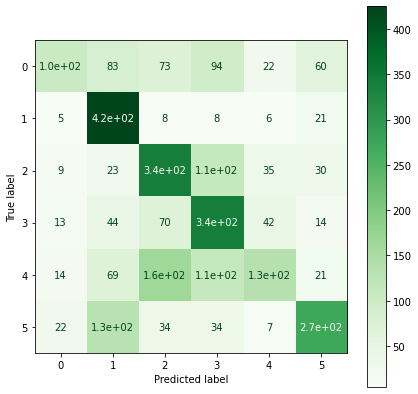

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(bagTree_clf, X_test, y_test, normalize=None, cmap='Greens', ax=ax)

El accuracy score mejora con respecto al anterior (es 0.5399) entorno a un 0.05 lo cual es bastante.<br>
<br>
En cuanto a la matriz de confusión, se puede observar que es muy similar a la anterior y las deducciones que hemos obtenido antes se mantienen, salvo por que algunos valores se mejoran ligeramente y hay alguno suelto que empeora.

## VotingClassifier con LogisticRegression, GaussianNB y SVC

In [ ]:
log_clf = LogisticRegression(random_state=1337, solver='lbfgs')
nb_clf = GaussianNB()
svm_clf = SVC(random_state=1337, gamma='auto')

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('nb', nb_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
   

In [ ]:
y_pred = voting_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

El resultado es: 0.5502839959906448


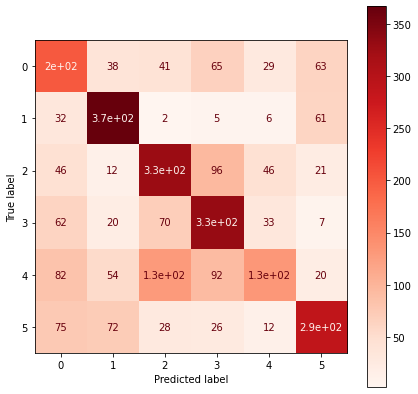

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(voting_clf, X_test, y_test, normalize=None, cmap='Reds', ax=ax)

El accuracy score mejora con respecto al anterior en 0.02.<br>
<br>


*   Mejora la identificación de edificios de forma significativa.
*   Las montañas ya no son confundidas con edificios tan amenudo.
*   La identificación de calles ha empeorado con respecto al anterior en distinguirlas de edificios pero a mejorado en su identificación con respecto a los bosques.



## AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=100, 
    random_state=1337)

ada_clf.fit(X_train, y_train);

In [ ]:
y_pred = ada_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

El resultado es: 0.47644503842298697


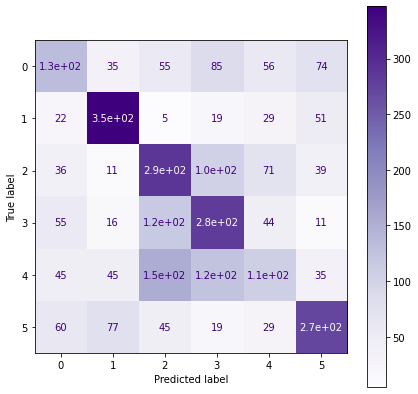

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(ada_clf, X_test, y_test, normalize=None, cmap='Purples', ax=ax)

Tiene peores resultados con respecto a todos los anteriores algoritmos.<br>
<br>
En la matriz de confusión se observa un aumento generalizado de los valores, lo que explica el peor resultado en el accuracy score.


## StackingClassifier

In [ ]:
log_clf = LogisticRegression(random_state=1337, solver='lbfgs')
nb_clf = GaussianNB()
svm_clf = SVC(random_state=1337, gamma='auto')

stack_clf = StackingClassifier(
    estimators=[('lr', log_clf), ('nb', nb_clf), ('svc', svm_clf)],
    final_estimator=SVC(random_state=1337, gamma='auto'),
    passthrough=True)

stack_clf.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
y_pred = stack_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

El resultado es: 0.5679919812896759


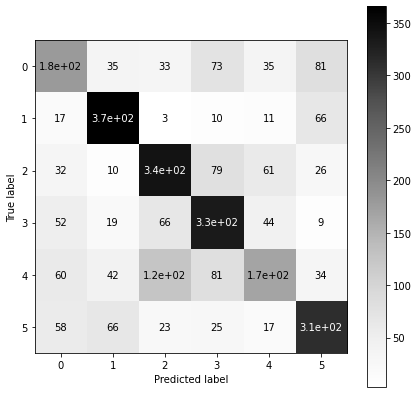

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(stack_clf, X_test, y_test, normalize=None, cmap='Greys', ax=ax)

En cuanto al accuracy score observamos que es claramente mejor que los anteriores pero debido a que su ejecución ha sido mucho más lenta (en torno a 3 horas) por ello consideramos que no es el mejor algoritmo de los vistos.<br>
<br>
La matriz de confusióon muestra unos resultados similares a los anteriores pero con claras mejoras, exceptuando algún pico de 70 o superior.

## Conclusiones generales
Resumen de lo observado en las diferentes matrices de confusión

En general se puede observar que las imágenes que más se confunden son:
*    Los mares con los glaciares, esto se explica por la similitud en los tonos de las imágenes.
*    Las calles con los edificios, porque las imágenes guardan muchas similitudes, la gama de colores, las líneas rectas y ángulos marcados en ambos tipos de imágenes.
*    Por último, los edificios son las imágenes que más le cuesta distinguir ya que los confunde con prácticamente todas las demás imágenes en las mismas proporciones.



# **Optimización con GridSearch**

In [ ]:
base_estimator_bagg = [DecisionTreeClassifier(random_state=1337, max_depth=1), SVC(random_state=1337)]
n_estimators_bagg = [1000, 1750]
max_samples_bagg = [1250, 1750]
max_features_bagg = [5, 10]

max_iter_log = [50, 100]
gamma_svm = ["scale", "auto"]

## BaggingClassifier

In [ ]:
grid_bagg = GridSearchCV(
    BaggingClassifier(),
    {
    "base_estimator": base_estimator_bagg,
    "n_estimators": n_estimators_bagg,
    "max_samples": max_samples_bagg,
    "max_features": max_features_bagg
    },
    n_jobs=-1,
)
grid_bagg.fit(X_train, y_train)
grid_bagg.best_params_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'base_estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=1337, shrinking=True,
     tol=0.001, verbose=False),
 'max_features': 10,
 'max_samples': 1750,
 'n_estimators': 1000}

Una vez obtenidos los datos adecuados los aplicamos

In [ ]:
bagg_clf = BaggingClassifier(
    base_estimator=SVC(random_state=1337), 
    n_estimators=1000,
    max_samples=1750, 
    max_features=10,
    n_jobs=-1, 
    random_state=1337)

bagg_clf.fit(X_train, y_train)
y_pred = bagg_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

El resultado es: 0.5573003675242232


Se puede observar claramente que el resultado del accuracy score es mejor que en la ejecución previa del BaggingClassifier lo que nos indica que el GridSearch se ha ejecutado correctamente.

## VotingClassifier

In [ ]:
grid_log = GridSearchCV(
    LogisticRegression(solver= "lbfgs", random_state=1337),
    {
    "max_iter": max_iter_log
    },
    n_jobs=-1,
)
grid_log.fit(X_train, y_train)
grid_log.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'max_iter': 50}

A continuación vamos a aplicar los valores obtenidos al VotingClassifier

In [ ]:
log_clf = LogisticRegression(random_state=1337, solver='lbfgs', max_iter=50)
nb_clf = GaussianNB()
svm_clf = SVC(random_state=1337, gamma='scale')

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('nb', nb_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_pred = voting_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

El resultado es: 0.5887069829602406


In [ ]:
log_clf = LogisticRegression(random_state=1337, solver='lbfgs', max_iter=50)
nb_clf = GaussianNB()
svm_clf = SVC(random_state=1337, gamma='auto')

vot_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('nb', nb_clf), ('svc', svm_clf)],
    voting='hard')

vot_clf.fit(X_train, y_train)
y_pred = vot_clf.predict(X_test)
print("El resultado es: " + str(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


El resultado es: 0.5626461744069495


Antes de nada, mencionar que hemos intentado realizar el GridSearch de SVC pero nos daba error todo el rato, de forma que hemos probado de forma manual cual de las dos opciones era mejor (scale o auto).
El resultado de SVC scale ha resultado ser mejor, por ello nos quedamos con el resultado 0.5887

# **Conclusiones**

Recapitulando, los pasos que hemos ido siguiendo para realizar este proyceto han sido:<br>


1.   Preprocesamiento de las imágenes del **DataSet** que se nos había dado, aplicando el filtro `unsharp_mask`, además de usar el `resize` para que todas las imágenes fueran de 85x85 y escogiendo solo 1050 de dichas imágenes.
2.   El siguiente paso fue aplicar por primera vez algoritmos de clasificación para ver qué resultados se obtenían. En concreto usamos **BaggingClassifier**, **VotingClassifier**, **AdaBoostClassifier** y **StackingClassifier**.
3.   Por último usamos **GridSearch** para buscar los hiperparámetros de algunos de los algoritmos, en este caso en **BaggingClassifier** y el **VotingClassifier**.



En la primera ejecución de los algoritmos de clasificación, previa a la realización de los **GridSearch** obtuvimos resultados del `accuracy score` comprendidos entre 0.476445 y 0.56799 el peor se daba en el **AdaBoostClassifier** y el mejor en el **StackingClassifier**.<br>
Pese a que el mejor resultado fue obtenido por el **StackingClassifier**, consideramos que no es el mejor algoritmo debido a que su ejecución fue con diferencia la más lenta, llegando a las 3 horas. Por ello bajo nuestro punto de vista en esta primera ejecución de los algoritmos el mejor sería el **VotingClassifier**, con un resultado en el `accuracy score` de 0.55028 y un tiempo de ejecución mucho menor.

En la ejecución posterior a los **GridSearch** decidimos hacerlo del **BaggingClassifier**, **VotingClassifier** y el **AdaBoostClassifier**. Pero debido a que el **AdaBoostClassifier** nos empezó a dar problemas y errores y no conseguimos solucionarlo, decidimos no incluirlo.<br>
En el caso del **BaggingClassifier** los resultados que obtuvimos en el `accuracy score` habían mejorado hasta el 0.557 desde el 0.4948 y el 0.5399, lo cual en el primer caso supone una mejora considerable.<br>
Por otro lado en el caso del **VotingClassifier**, como ya hemos comentado arriba nos surgió un problema en el **GridSearch** del **SVC** y decidimos hacer a mano parte. Los resultados que obtuvimos en el `accuracy score` son de 0.5887 lo que implica ser el mejor resultado de todos los algoritmos realizados, además de una mejora con respecto al resultado previo al **GridSearch**.

El resultado final obtenido nos parece adecuado dado que el **DataSet** estaba muy poco pulido. De hecho hicimos pruebas puliéndolo de forma manual (manteniendo siempre las proporciones de los datos) y obtuvimos mejoras considerables en los resultados de hasta una subida de 0.08 del `accuracy score`. El factor limitante en esta práctica han sido sin duda los tiempos de ejecución y la RAM del entorno, de hecho nos hemos visto obligados a limitar a 1050 el número de imágenes de cada sección para garantizar la correcta ejecución de los algoritmos dentro de Google Colab, además de reducir la calidad de la imágen a casi la mitad de la original.<br>
Esto unido a que un **Algoritmo de Clasificación** de los estudiados rara vez será mejor que una **Red Neuronal Convolucional** en la distinción e identificación de imágenes, nos hace ver que los resultados obtenidos son mejores de lo que parecen.